In [43]:
## BUSINESS OBJECTIVE: To predict the conditions that lead to the highest number of vehicles involved in an accident

In [1]:
#     OBJECTIVE QUESTIONS

### 1.	To determine the effect of road type on the  number of vehicles involved in accidents. 
      ## (Road Type VS Number of Vehicles)
         
### 2.   To determine how road surface conditions affect the number of vehicles involved in accidents.
        ##(Road Surface Conditions VS Number of Vehicles)
         
### 3.	Predict how weather conditions affect the number of vehicles involved in accidents. 
      ## (Weather conditions VS Number of vehicles)

### 4.   Investigate the effect of lighting conditions on the number of vehicles involved in accidents.
      ## (Lighting conditions VS Number of Vehicles)

### 5.   Determine how speed limits has an effect on the number of vehicles involved in an accidents)
      ##(Speed Limit Vs Number of Vehicles)

In [82]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [84]:
# Load the dataset
file_path = "UK_Accident.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

# Drop the 'Unnamed: 0' column if it's the index column or if it's not needed for training
data = data.drop(columns=['Unnamed: 0'], errors='ignore')  # Use 'data' not 'train_df

In [85]:
# Understand the dataset
print("First few rows of the dataset:")
data.head()

First few rows of the dataset:


,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240,-0.191170,51.489096,1,2,1,1,4/1/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650,-0.211708,51.520075,1,3,1,1,5/1/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240,-0.206458,51.525301,1,3,2,1,6/1/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530,-0.173862,51.482442,1,3,1,1,7/1/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040,-0.156618,51.495752,1,3,1,1,10/1/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [86]:
print(data.head())

  Accident_Index  Location_Easting_OSGR  Location_Northing_OSGR  Longitude  \
0  200501BS00001               525680.0                  178240  -0.191170   
1  200501BS00002               524170.0                  181650  -0.211708   
2  200501BS00003               524520.0                  182240  -0.206458   
3  200501BS00004               526900.0                  177530  -0.173862   
4  200501BS00005               528060.0                  179040  -0.156618   

    Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
0  51.489096             1                  2                   1   
1  51.520075             1                  3                   1   
2  51.525301             1                  3                   2   
3  51.482442             1                  3                   1   
4  51.495752             1                  3                   1   

   Number_of_Casualties       Date  ...  \
0                     1   4/1/2005  ...   
1                     1   5/1/

In [90]:
print("\nColumns in the dataset:")
print(data.columns)


Columns in the dataset:
Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')


In [92]:
print("\nDataset Information:")
print(data.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 32 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Accident_Index                               1048575 non-null  object 
 1   Location_Easting_OSGR                        1048474 non-null  float64
 2   Location_Northing_OSGR                       1048575 non-null  int64  
 3   Longitude                                    1048474 non-null  float64
 4   Latitude                                     1048575 non-null  float64
 5   Police_Force                                 1048575 non-null  int64  
 6   Accident_Severity                            1048575 non-null  int64  
 7   Number_of_Vehicles                           1048575 non-null  int64  
 8   Number_of_Casualties                         1048575 non-null  int64  
 9   Date                    

In [94]:
print("\nDataset Description:")
print(data.describe())


Dataset Description:
       Location_Easting_OSGR  Location_Northing_OSGR     Longitude  \
count           1.048474e+06            1.048575e+06  1.048474e+06   
mean            4.385782e+05            2.997915e+05 -1.451933e+00   
std             9.551618e+04            1.613714e+05  1.404224e+00   
min             6.495000e+04            0.000000e+00 -7.516225e+00   
25%             3.743625e+05            1.785815e+05 -2.385540e+00   
50%             4.387700e+05            2.689000e+05 -1.420841e+00   
75%             5.227800e+05            3.972100e+05 -2.239450e-01   
max             6.553700e+05            1.208800e+06  1.759398e+00   

           Latitude  Police_Force  Accident_Severity  Number_of_Vehicles  \
count  1.048575e+06  1.048575e+06       1.048575e+06        1.048575e+06   
mean   5.258130e+01  3.072207e+01       2.841090e+00        1.832601e+00   
std    1.541738e+00  2.559620e+01       4.007862e-01        7.164625e-01   
min    0.000000e+00  1.000000e+00       1.0

In [96]:
# Handling missing data
print("\nMissing Data Count:")
print(data.isnull().sum())
data = data.dropna()  # Drop rows with missing data
print("\nDataset after dropping rows with missing data:")
print(data.info())


Missing Data Count:
Accident_Index                                       0
Location_Easting_OSGR                              101
Location_Northing_OSGR                               0
Longitude                                          101
Latitude                                             0
Police_Force                                         0
Accident_Severity                                    0
Number_of_Vehicles                                   0
Number_of_Casualties                                 0
Date                                                 0
Day_of_Week                                          0
Time                                               104
Local_Authority_(District)                           0
Local_Authority_(Highway)                            0
1st_Road_Class                                       0
1st_Road_Number                                      0
Road_Type                                            0
Speed_limit                                 

In [97]:
# Check for duplicates
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())
data = data.drop_duplicates()


Number of duplicate rows:
0


In [100]:
# Extract the Year column from Date
data['Year'] = pd.to_datetime(data['Date'], format="%d/%m/%Y").dt.year

In [102]:
# Remove data from years 2005-2008
data = data[~data['Year'].between(2005, 2008)]

In [104]:
# Drop unnecessary columns
columns_to_drop = ['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 
                   'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity', 
                   'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 
                   'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', 
                   '1st_Road_Number', '2nd_Road_Class', '2nd_Road_Number', 
                   'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 
                   'Special_Conditions_at_Site', 'Carriageway_Hazards', 
                   'Did_Police_Officer_Attend_Scene_of_Accident', 'LSOA_of_Accident_Location']
data = data.drop(columns=columns_to_drop)

In [106]:
# Print dataset after dropping columns
print("\nDataset after dropping unwanted columns:")
data.head()


Dataset after dropping unwanted columns:


,Number_of_Vehicles,Road_Type,Speed_limit,Junction_Control,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Year
570206,1,Single carriageway,30,Giveway or uncontrolled,Daylight: Street light present,Fine without high winds,Dry,1,2009
572271,2,Single carriageway,30,Giveway or uncontrolled,Daylight: Street light present,Fine without high winds,Dry,1,2009
572444,1,Single carriageway,30,Giveway or uncontrolled,Darkness: Street lights present and lit,Fine without high winds,Dry,1,2009
573756,1,Dual carriageway,30,Giveway or uncontrolled,Darkness: Street lights present and lit,Other,Wet/Damp,1,2009
574359,2,Single carriageway,30,Giveway or uncontrolled,Daylight: Street light present,Fine without high winds,Dry,1,2009


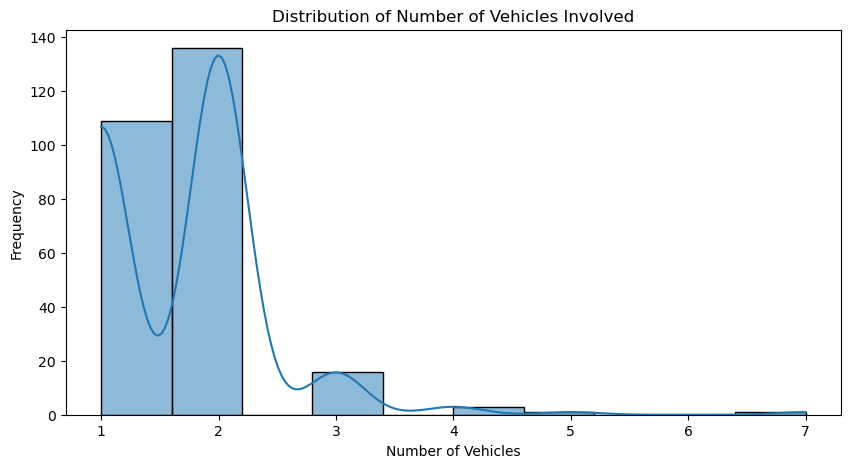

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Number_of_Vehicles
plt.figure(figsize=(10, 5))
sns.histplot(data['Number_of_Vehicles'], bins=10, kde=True)  # Use histplot
plt.title('Distribution of Number of Vehicles Involved')
plt.xlabel('Number of Vehicles')
plt.ylabel('Frequency')
plt.show()

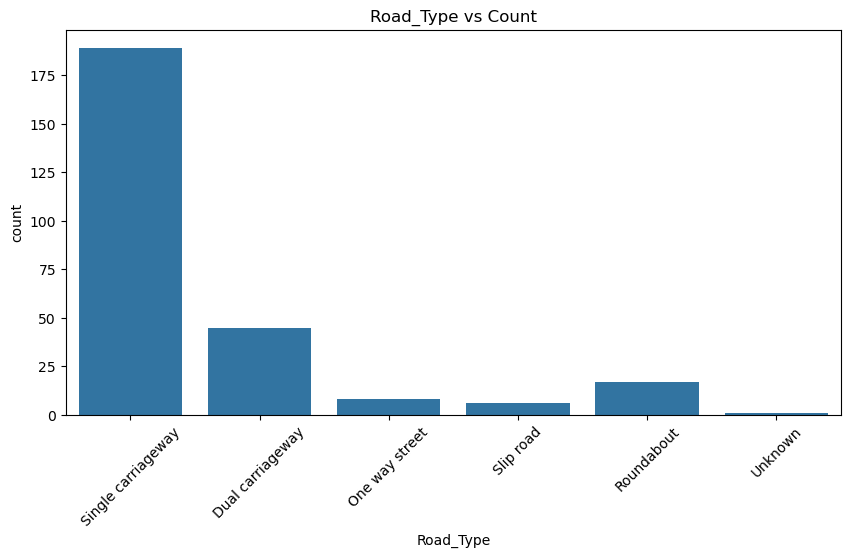

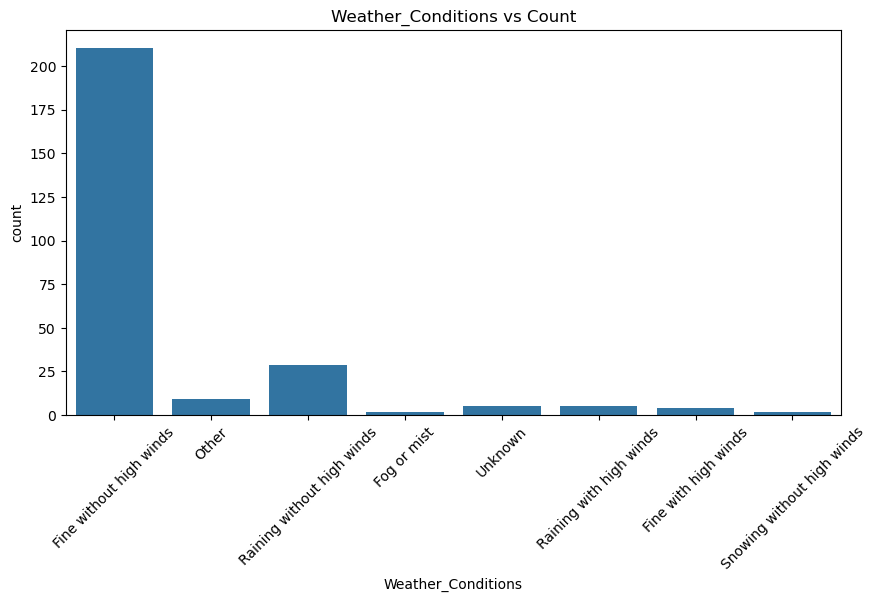

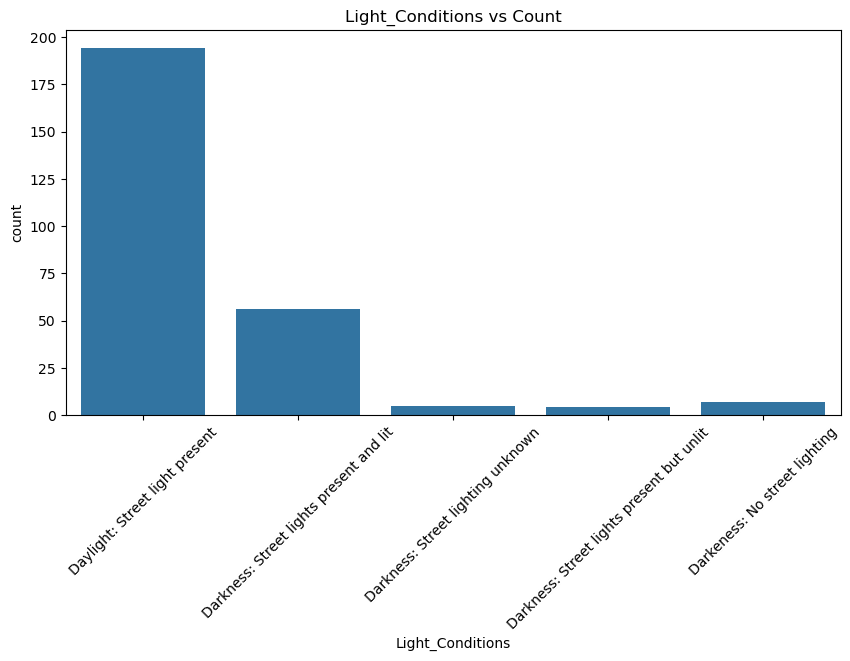

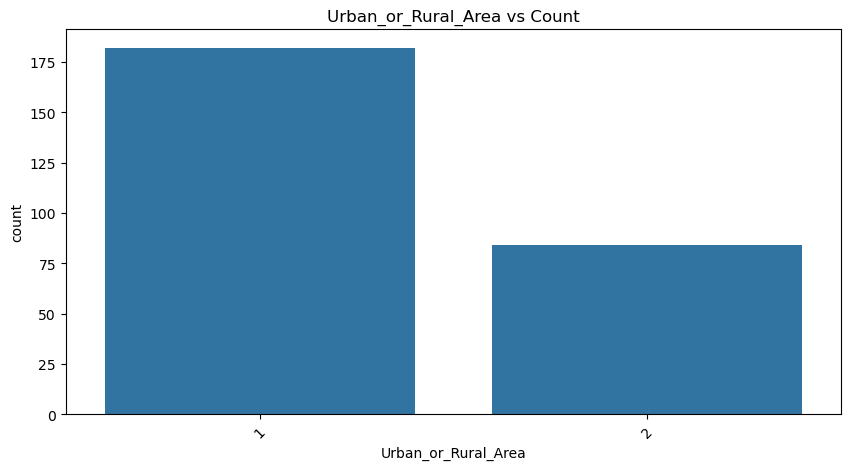

In [110]:
# Bar plots for categorical variables
categorical_columns = ['Road_Type', 'Weather_Conditions', 'Light_Conditions', 'Urban_or_Rural_Area']
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=data)
    plt.title(f'{col} vs Count')
    plt.xticks(rotation=45)
    plt.show()

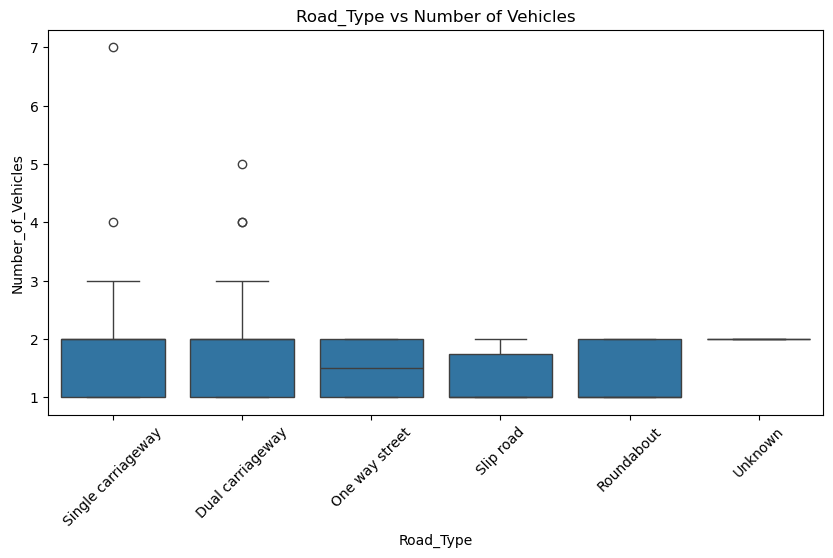

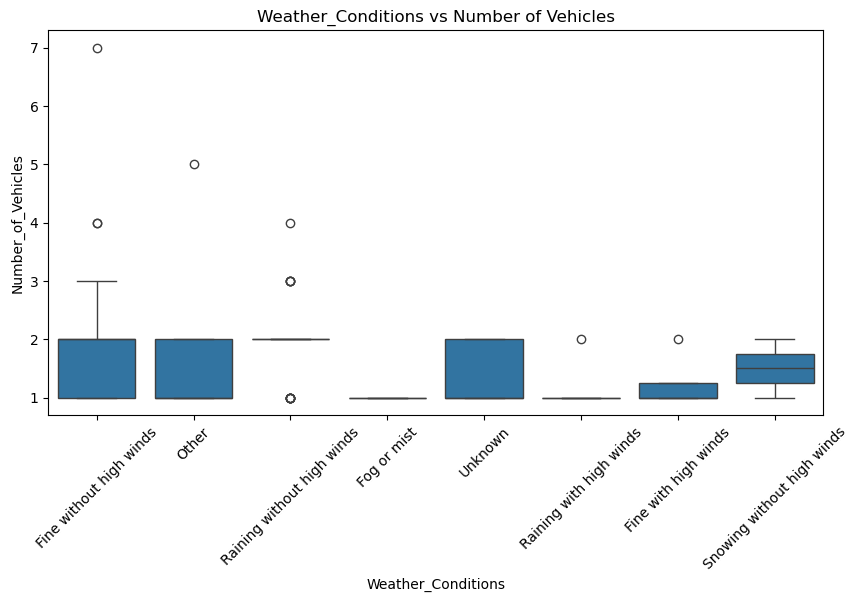

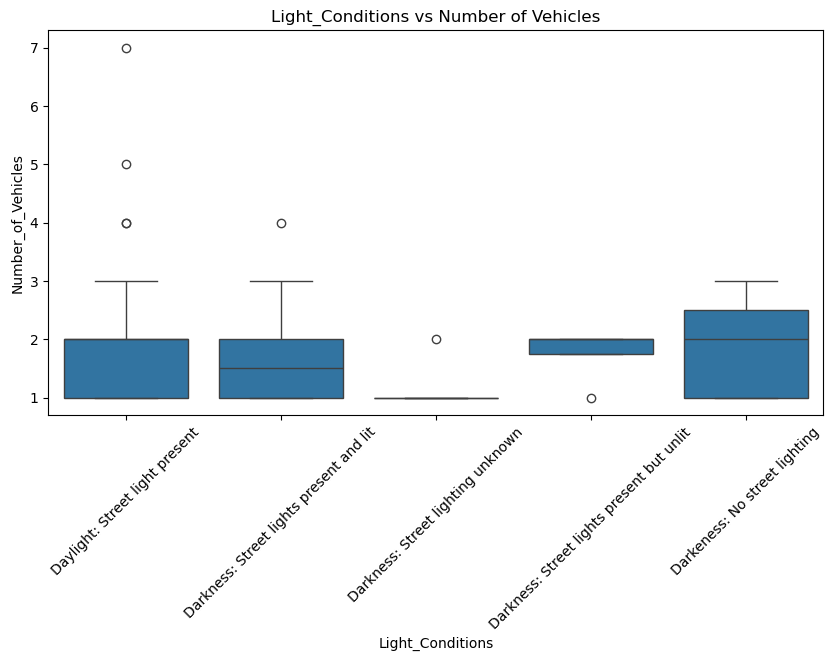

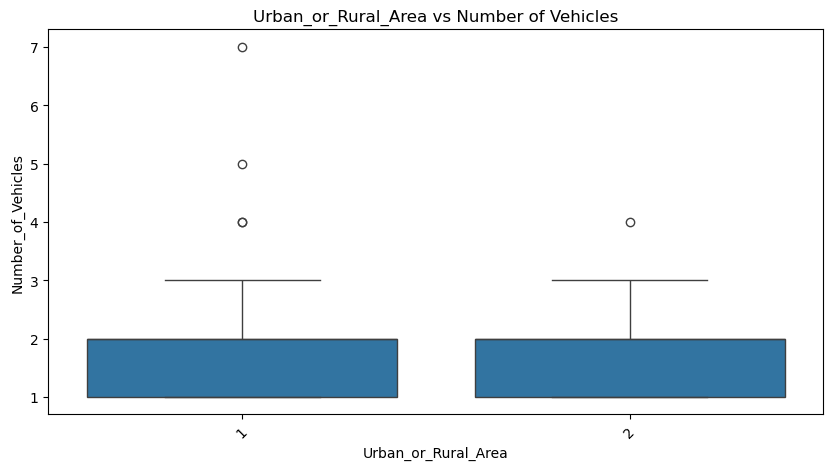

In [111]:
# Boxplot to visualize the relationship between features and Number_of_Vehicles
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=col, y='Number_of_Vehicles', data=data)
    plt.title(f'{col} vs Number of Vehicles')
    plt.xticks(rotation=45)
    plt.show()

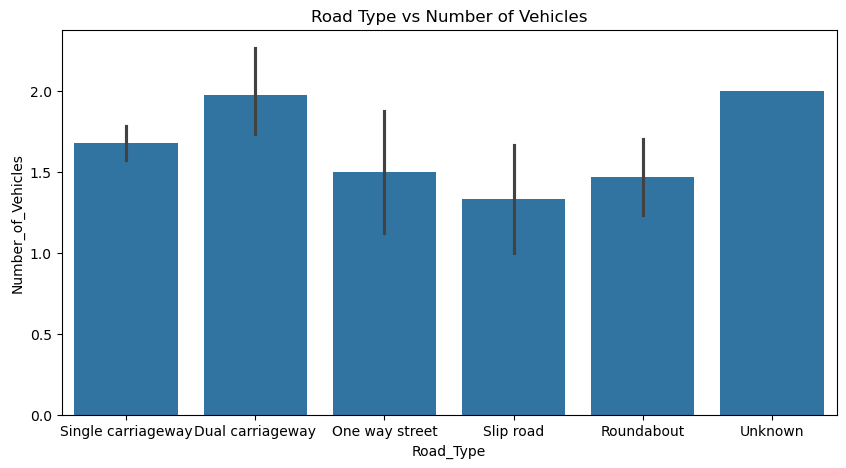

In [113]:
# Road Type vs. Number of Vehicles
plt.figure(figsize=(10, 5))
sns.barplot(x='Road_Type', y='Number_of_Vehicles', data=data)
plt.title("Road Type vs Number of Vehicles")
plt.show()

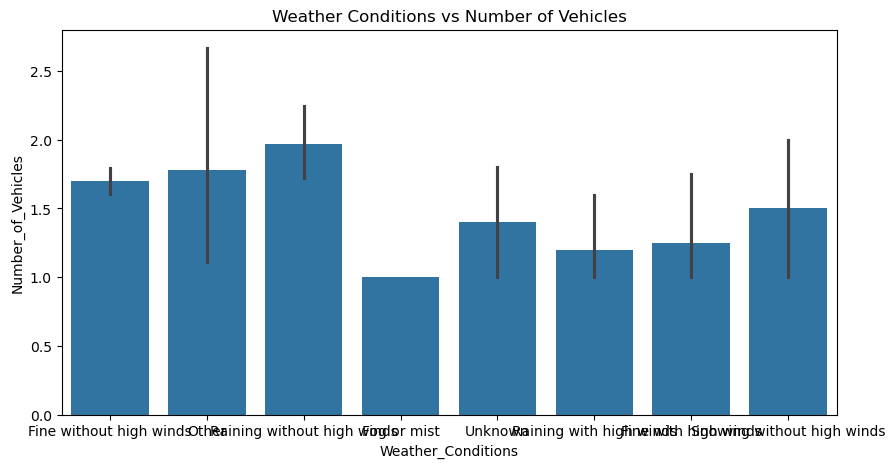

In [116]:
# Weather Condition vs. Number of Vehicles
plt.figure(figsize=(10, 5))
sns.barplot(x='Weather_Conditions', y='Number_of_Vehicles', data=data)
plt.title("Weather Conditions vs Number of Vehicles")
plt.show()

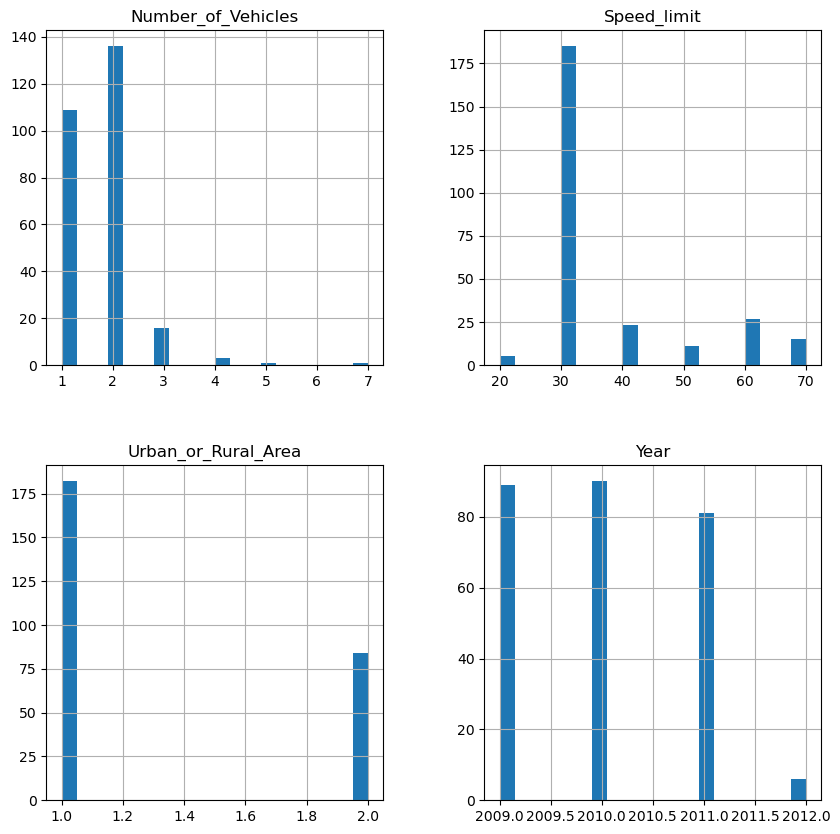

In [118]:
data.hist(bins=20, figsize=(10, 10))
plt.show()

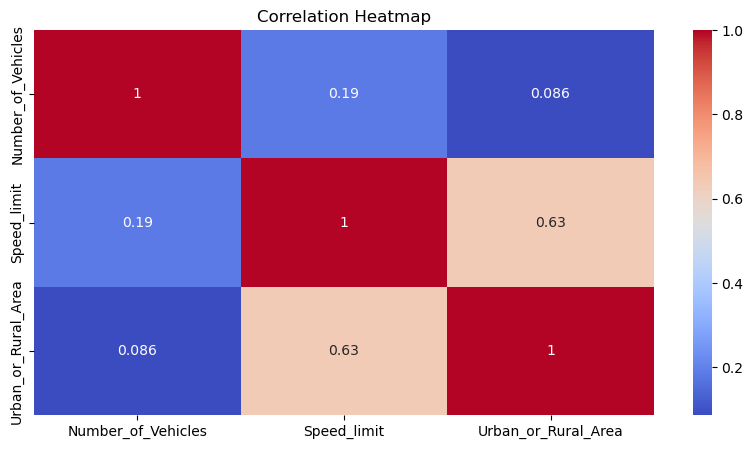

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [122]:
# Check the data types to identify numeric columns
print(data.dtypes)

# Select only the numeric columns (e.g., Number_of_Vehicles, Speed_limit)
data_numeric = data[['Number_of_Vehicles', 'Speed_limit', 'Year']]  # Adjust the columns as needed

# Add constant for intercept in the VIF calculation
from statsmodels.tools.tools import add_constant
subset_data_const = add_constant(data_numeric)

# Create an empty DataFrame to store VIF results
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()

# Store feature names in the "feature" column
vif_data["feature"] = subset_data_const.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(subset_data_const.values, i) 
                   for i in range(subset_data_const.shape[1])]

# Print the VIF data
print(vif_data)

Number_of_Vehicles          int64
Road_Type                  object
Speed_limit                 int64
Junction_Control           object
Light_Conditions           object
Weather_Conditions         object
Road_Surface_Conditions    object
Urban_or_Rural_Area         int64
Year                        int32
dtype: object
              feature           VIF
0               const  5.578770e+06
1  Number_of_Vehicles  1.038077e+00
2         Speed_limit  1.041045e+00
3                Year  1.006672e+00


In [124]:
# Data Preprocessing
# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

In [126]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Identify categorical columns
categorical_columns = ['Road_Type', 'Junction_Control', 'Light_Conditions', 
                       'Weather_Conditions', 'Road_Surface_Conditions', 
                       'Urban_or_Rural_Area']

# Apply Label Encoding for simplicity
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Save encoders if needed for inverse transformation


In [128]:
# Define target and features
X = data.drop(columns=['Number_of_Vehicles'])  # Features
y = data['Number_of_Vehicles']  # Target

In [130]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [132]:
# Model training and evaluation
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

In [134]:
results = {}
feature_importances = {}

In [136]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {"MSE": mse, "R^2": r2}
    print(f"{model_name} - MSE: {mse}, R^2: {r2}")
    
    if model_name in ["Decision Tree", "Random Forest"]:
        feature_importances[model_name] = model.feature_importances_

Linear Regression - MSE: 0.5991845706254325, R^2: -0.05001334612004893
Decision Tree - MSE: 0.7834697804130378, R^2: -0.37295545654111684
KNN - MSE: 0.9162962962962963, R^2: -0.6057211538461538
Random Forest - MSE: 0.6201307204249366, R^2: -0.08671945959081429


In [138]:
print(feature_importances)

{'Decision Tree': array([0.21199692, 0.13066579, 0.10414389, 0.07501146, 0.12813451,
       0.05138037, 0.18461591, 0.11405115]), 'Random Forest': array([0.16545025, 0.15744425, 0.1353552 , 0.08608209, 0.10412554,
       0.05964039, 0.10164706, 0.19025521])}


In [140]:
# Compare models
print("\nModel Comparison:")
for model_name, metrics in results.items():
    print(f"{model_name}: MSE={metrics['MSE']}, R^2={metrics['R^2']}")


Model Comparison:
Linear Regression: MSE=0.5991845706254325, R^2=-0.05001334612004893
Decision Tree: MSE=0.7834697804130378, R^2=-0.37295545654111684
KNN: MSE=0.9162962962962963, R^2=-0.6057211538461538
Random Forest: MSE=0.6201307204249366, R^2=-0.08671945959081429


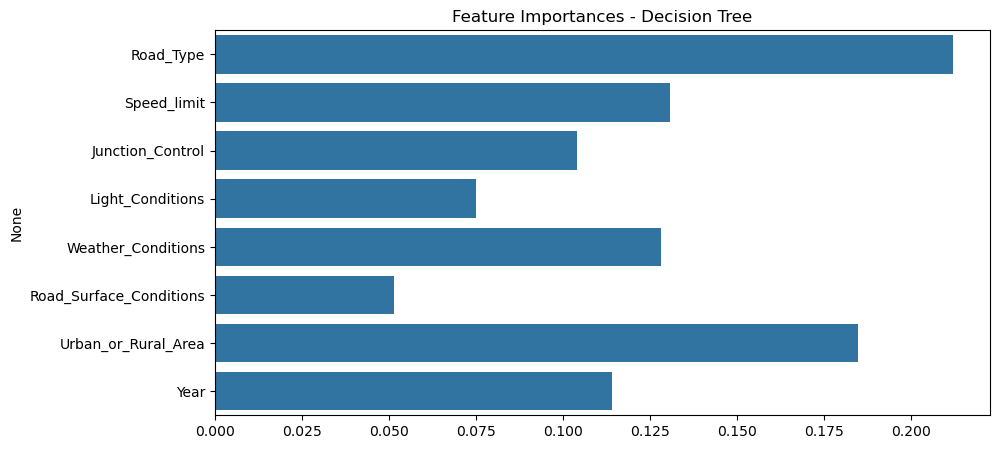

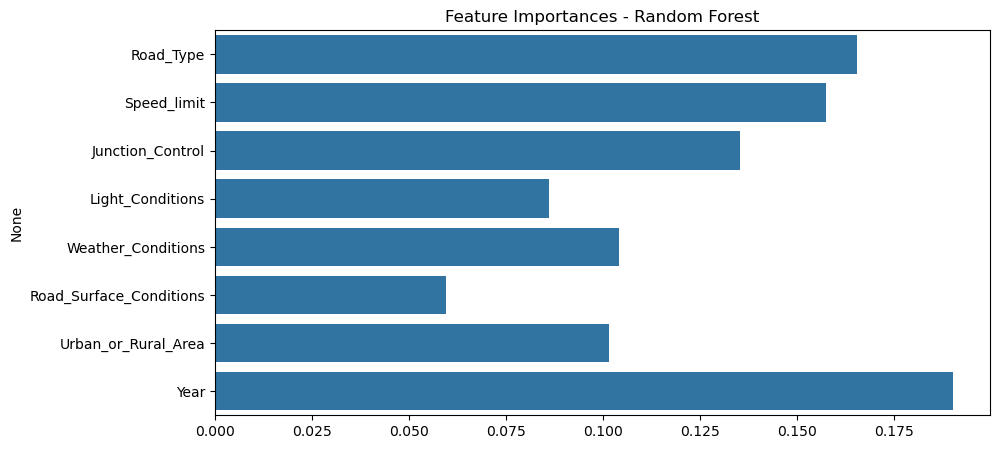

In [142]:
# Visualize feature importance for tree-based models
for model_name, importances in feature_importances.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(x=importances, y=X.columns)
    plt.title(f"Feature Importances - {model_name}")
    plt.show()

In [151]:
# Assuming you're using RandomForestRegressor for training
from sklearn.ensemble import RandomForestRegressor
import pickle

# Define your model
model = RandomForestRegressor(random_state=42)

# Train your model on X_train and y_train
model.fit(X_train, y_train)

# Save the trained model
with open('rf_model_pickle.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save feature importances if using Random Forest or Decision Tree
feature_importances = model.feature_importances_

# Save feature importances to a pickle file as well
with open('feature_importances.pkl', 'wb') as f:
    pickle.dump(feature_importances, f)



In [153]:
# Load the pre-trained model
with open('rf_model_pickle.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Load feature importances
with open('feature_importances.pkl', 'rb') as f:
    feature_importances = pickle.load(f)

# Proceed with the Streamlit app code as before